In [1]:
# Import packages
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import scarlet
import pickle

import kuaizi as kz
from kuaizi.display import display_single, SEG_CMAP

import sep

import astropy.units as u
from astropy import wcs
from astropy.io import fits
from astropy.table import Table, Column, hstack
from astropy.coordinates import SkyCoord

#plt.rcParams['font.size'] = 15
#plt.rc('image', cmap='inferno', interpolation='none', origin='lower')

### Make one figure containing all useful information

In [2]:
kz.utils.set_env(project='HSC', name='LSBG', data_dir='/tiger/scratch/gpfs/jiaxuanl/Data')

'/tiger/scratch/gpfs/jiaxuanl/Data/HSC/LSBG'

In [3]:
lsbg_cat = Table.read('./Cutout/Candy/candy_cutout_cat.fits')

In [4]:
lsbg_cat[5:10]

ra,dec,a_image,b_image,theta_image,ellipticity,mag_auto_g,mag_auto_r,mag_auto_i,flux_radius_ave_g,flux_radius_ave_i,mu_ave_g,mu_ave_i,acorr_ratio,g-i,g-r,A_g,A_r,A_i,tract,patch,synth_id,viz-id,objectid,Seq,cutout_size,prefix,radius,image_flag [5],psf_flag [5]
,,,,,,,,,,,,,,,,,,,,,,,,,arcmin,,arcsec,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,bytes3,int64,int64,int64,int64,float64,bytes54,float64,bool,bool
331.2500584,2.5332478,23.476,12.093,76.48,0.485,20.5201,19.08,18.372,5.789364000000001,19.044984000000003,25.655684139938153,26.534713989179053,1.1046843987026607,0.8967891268861623,0.5579434027076123,0.10967694166272776,0.07772034437034002,0.055466068548889545,9935,"7,6",-1,20553,20553,5,1.0,/tigress/jiaxuanl/Data/HSC/LSBG/Cutout/Candy/candy_5,1.0,True .. True,True .. True
135.4575332,0.5149136,16.263,8.649,41.46,0.468,22.0135,20.7251,20.4586,5.376672,14.622636000000002,27.093657182332308,28.130653511193152,1.1649765219915054,0.4037710644546533,0.27309170382745984,0.10951116934800562,0.07760287317546577,0.055382233802656715,9560,"1,3",-1,13287,13287,6,1.0,/tigress/jiaxuanl/Data/HSC/LSBG/Cutout/Candy/candy_6,1.0,True .. True,True .. True
219.9203081,-0.3028244,82.189,39.671,5.8,0.517,16.614,16.0895,15.8603,14.563164,17.005464000000003,23.85657960803078,23.465128128573784,1.0187439658541528,0.44859327306754665,0.32284059025633904,0.10865697632830244,0.07699756658463992,0.05495024939584735,9375,"8,6",-1,62667,62667,7,1.0,/tigress/jiaxuanl/Data/HSC/LSBG/Cutout/Candy/candy_7,1.0,True .. True,True .. True
36.2798908,-1.8697825,14.893,7.693,-53.67,0.483,21.9497,20.4832,20.7328,7.7301,12.820332,27.707038618325953,28.117840902223843,1.2946471520556513,0.7026491500339989,0.4480505002077785,0.08871701998753034,0.06286752019530838,0.04486617002153174,9008,"1,6",-1,39546,39546,8,1.0,/tigress/jiaxuanl/Data/HSC/LSBG/Cutout/Candy/candy_8,1.0,True .. True,True .. True
184.3720021,1.1988482,47.938,37.974,35.11,0.208,17.3345,16.8943,16.683,10.766784000000001,11.604432000000001,23.933248926119255,23.430356911534293,1.0359074554871497,0.6287644686851798,0.41207867928750813,0.0577317726788558,0.04091045196636518,0.02919624136403626,9593,"0,6",-1,24145,24145,9,1.0,/tigress/jiaxuanl/Data/HSC/LSBG/Cutout/Candy/candy_9,1.0,True .. True,True .. True


### Run scarlet modeling

In [4]:
from kuaizi.fitting import fitting_wavelet_obs_tigress, _fitting_wavelet
import os

In [6]:
# scarlet_flag
# 0: not processed
# 1: no bug
# -1: problematic
# lsbg_cat['scarlet_flag_0.5'] = np.zeros(len(lsbg_cat), dtype=int)

In [10]:
fail_logger = kz.utils.set_logger(logger_name='candy_test_fail', file_name='candy_fail', level='ERROR')
global_logger = kz.utils.set_logger(logger_name='candy_test', file_name='candy_log', level='INFO')

### Running scarlet wavelet modeling for `/tigress/jiaxuanl/Data/HSC/LSBG/Cutout/Candy/candy_99`
    Working directory: /tiger/scratch/gpfs/jiaxuanl/Data/HSC/LSBG
  - Detect sources and make mask
    Query GAIA stars...
    Taking Gaia catalogs stored in `Tigress`
    12 stars from Gaia are masked!
    Detected 175 objects
    12 stars from Gaia are masked!
    Detected 262 objects
    Detected 92 objects
  - Wavelet modeling with the following hyperparameters:
    min_grad = -0.20, starlet_thresh = 0.50 (contam_ratio = 0.01).
    Total number of sources: 20
    Optimizaiton: Succeed for e_rel = 1e-04 with 25 iterations! Try higher accuracy!
  ! Might be poor fitting! Iterations less than 50.
  - After 46 iterations, logL = 2536846.21
    Elapsed time for fitting: 30.90 s
  - Components [0] are considered as the target galaxy.
  - Masking stars and other sources that are modeled, to deal with leaky flux issue.
  - Saving the results as /tiger/scratch/gpfs/jiaxuanl/Data/HSC/LSBG/Model/c

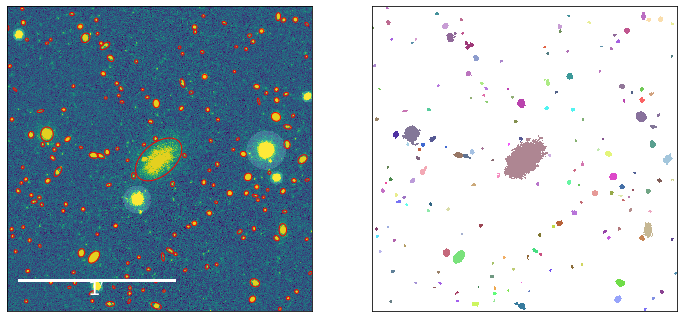

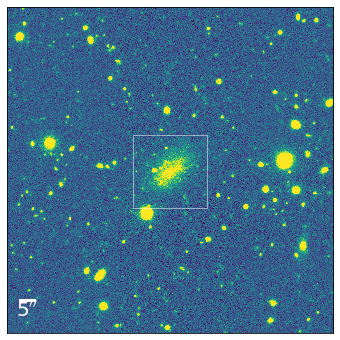

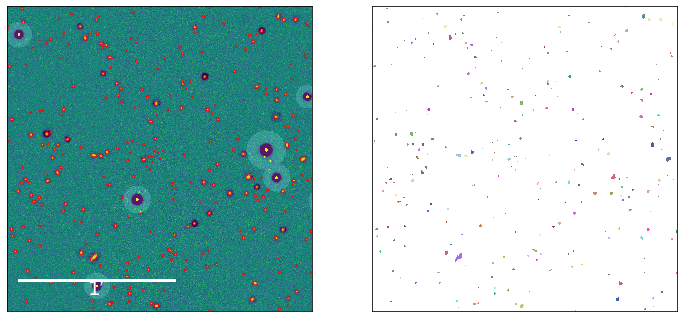

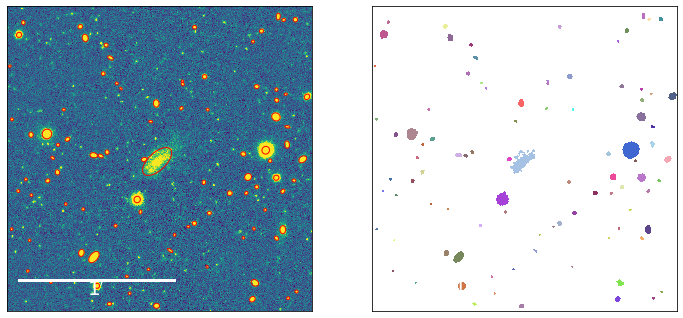

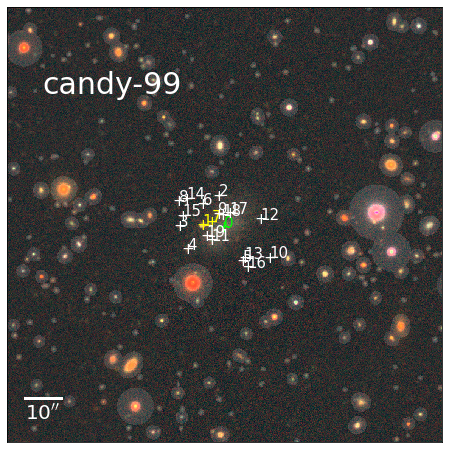

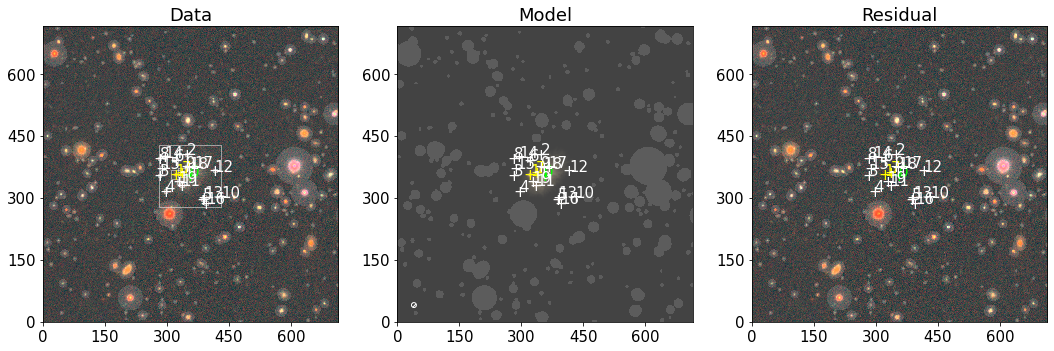

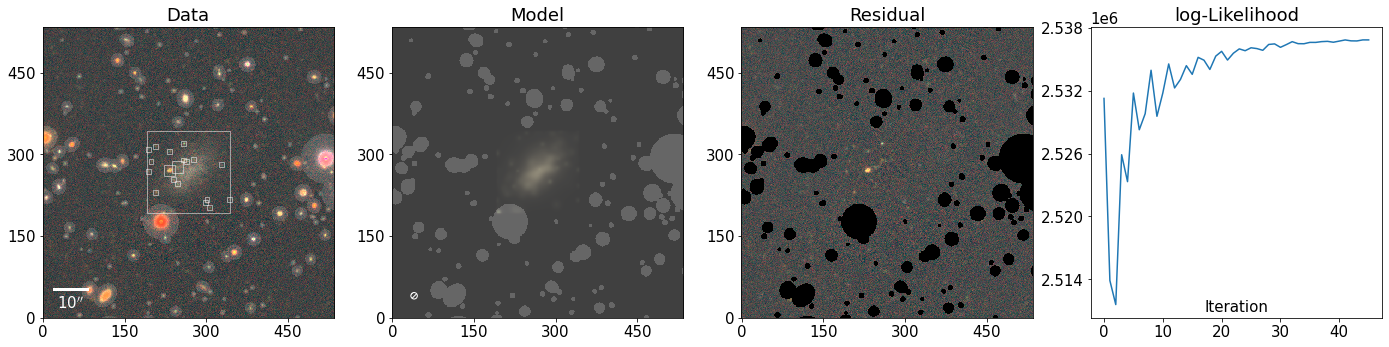

In [19]:
index = 84
blend = fitting_wavelet_obs_tigress(
    {'project': 'HSC', 'name': 'LSBG', 'data_dir': '/tiger/scratch/gpfs/jiaxuanl/Data'}, 
    lsbg_cat[index],
    name='Seq',
    channels='griz',
    starlet_thresh=0.5,
    prefix='candy',
    show_figure=True, 
    global_logger=None, # global_logger, 
    fail_logger=None, # fail_logger
)

# if blend: # if succeeded
#     lsbg_cat[index]['scarlet_flag_0.5'] = 1
# else:
#     lsbg_cat[index]['scarlet_flag_0.5'] = -1

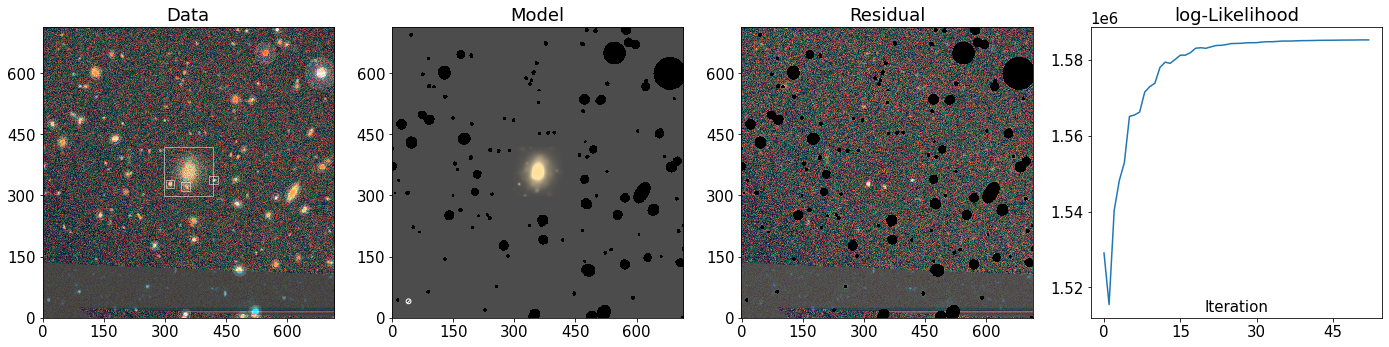

In [97]:
fig = kz.display.display_scarlet_results_tigress(
        blend,
        show_ind=[0],
        #zoomin_size=120,
        minimum=-0.3,
        stretch=1,
        Q=1,
        channels='griz',
        show_loss=True,
        show_mask=True,
        show_mark=False,
        scale_bar=False)

#plt.savefig('/tigress/jiaxuanl/public_html/candy/candy-2-zoomin.png', dpi=55, bbox_inches='tight')

## Multiprocessing

In [61]:
lsbg_cat['scarlet_flag_0.5'] = np.zeros(len(lsbg_cat), dtype=int)
global_logger = kz.utils.set_logger(logger_name='candy_sample', file_name='candy_log', level='ERROR')

In [60]:
from multiprocessing import Pool, Manager
from functools import partial

In [63]:
def multiprocess_fitting(index):
    #if not os.path.isfile(f'./Models/LSBG-{lsbg_cat[index]["Seq"]:04d}-trained-model-wavelet.df'): 
    blend = fitting_wavelet_obs_tigress(
        {'project': 'HSC', 'name': 'LSBG', 'data_dir': '/tigress/jiaxuanl/Data'}, 
        lsbg_cat[index],
        name='Seq',
        channels='griz',
        starlet_thresh=0.5,
        prefix='candy',
        show_figure=False, 
        global_logger=global_logger)
    if blend: # if succeeded
        lsbg_cat[index]['scarlet_flag_0.5'] = 1
    else:
        lsbg_cat[index]['scarlet_flag_0.5'] = -1

print('Number of processor to use:')
n_jobs = 6
manager = Manager()
pool = Pool(n_jobs)

#measurement_cat = manager.dict()
iterable = np.arange(0, 21, 1) # np.random.randint(0, len(lsbg_cat), 50)

#func = partial(fitting_single_comp, s18a)
pool.map(multiprocess_fitting, iterable)
pool.close()
pool.join()

Number of processor to use:
### Running scarlet wavelet modeling for `/tigress/jiaxuanl/Data/HSC/LSBG/Cutout/Candy/candy_2`
### Running scarlet wavelet modeling for `/tigress/jiaxuanl/Data/HSC/LSBG/Cutout/Candy/candy_0`### Running scarlet wavelet modeling for `/tigress/jiaxuanl/Data/HSC/LSBG/Cutout/Candy/candy_1`### Running scarlet wavelet modeling for `/tigress/jiaxuanl/Data/HSC/LSBG/Cutout/Candy/candy_4`
### Running scarlet wavelet modeling for `/tigress/jiaxuanl/Data/HSC/LSBG/Cutout/Candy/candy_3`
### Running scarlet wavelet modeling for `/tigress/jiaxuanl/Data/HSC/LSBG/Cutout/Candy/candy_5`


  - Detect sources and make mask
    Query GAIA stars...
    Taking Gaia catalogs stored in `Tigress`
  - Detect sources and make mask  - Detect sources and make mask  - Detect sources and make mask  - Detect sources and make mask



    Query GAIA stars...    Query GAIA stars...    Query GAIA stars...    Query GAIA stars...



    Taking Gaia catalogs stored in `Tigress`    Taking Gaia catalo

## Generate html

In [14]:
import os, re
import numpy as np

In [ ]:
## get the indices of successful modeling
figlist = os.listdir('/tigress/jiaxuanl/Data/HSC/LSBG/Figure/')
figlist = [item for item in figlist if '-zoomin-wavelet.png' in item] # only select png
ind_array = np.asarray([re.findall('-\d+-', item)[0].strip('-') for item in figlist], dtype=int)
ind_array.sort()
fail_array = np.setdiff1d(np.arange(0, len(lsbg_cat)), ind_array)
print(f'Failed {len(fail_array)} galaxies (based on checking figures):', fail_array)

## Check log files, find out error items
with open('/tigress/jiaxuanl/Data/HSC/LSBG/candy_fail_0_100', 'r') as f:
    log = f.read()
    f.close()    
with open('/tigress/jiaxuanl/Data/HSC/LSBG/candy_fail_100_200', 'r') as f:
    log = f.read()
    f.close()
with open('/tigress/jiaxuanl/Data/HSC/LSBG/candy_fail_200_300', 'r') as f:
    log = f.read()
    f.close()
with open('/tigress/jiaxuanl/Data/HSC/LSBG/candy_fail_complement', 'r') as f:
    log = f.read()
    f.close()

loglist = log.split('\n')
loglist = [item for item in loglist if len(item) > 0]
loglist = [item for item in loglist if 'ERROR' in item] # find out error items
fail_log_array = np.unique(np.array([re.findall('candy_\d+', item)[0].strip('candy_') for item in loglist], dtype=int))
print(f'Failed {len(fail_log_array)} galaxies (based on checking log files):', fail_log_array)

In [6]:
os.system('cp /tigress/jiaxuanl/Data/HSC/LSBG/Figure/candy-*-zoomin-*.png /tigress/jiaxuanl/public_html/candy/scarlet_zoomin')

0

In [1]:
# webpage at `/tigress/jiaxuanl/public_html/candy/scarlet_zoomin/`
# http://tigress-web.princeton.edu/~jiaxuanl/candy/scarlet_zoomin/page1.html

In [16]:
## Count figures in public_html/candy/scarlet_zoomin
# figlist = os.listdir('/tigress/jiaxuanl/public_html/candy/scarlet_zoomin/')
# figlist = [item for item in figlist if '-zoomin-wavelet.png' in item] # only select png
# index_list = [int(re.findall('\d+', item)[0]) for item in figlist]
# index_list = np.sort(index_list)
print(f'You have {len(ind_array)} galaxies to be displayed')

row_num = 10
page_num = int(np.ceil(len(lsbg_cat) // (row_num)))
print('Total pages:', page_num)

You have 295 galaxies to be displayed
Total pages: 30


In [19]:
for k in range(page_num):
    f = open(f'/tigress/jiaxuanl/public_html/candy/scarlet_zoomin/page{k + 1}.html', 'w')
    f.write('<!DOCTYPE html> \n<html><head> \n<link rel="stylesheet" type="text/css" href="../../mystyle.css"> \n</head><body> \n\n')
    f.write('<script src="//code.jquery.com/jquery-1.11.3.min.js"></script>\n')
    f.write('<script type="text/javascript" src="../../myjs.js"></script> \n')
    f.write('<title>Scarlet Modeling Candy Sample</title> \n')
    f.write('\n\n</head><body> \n\n')
    
    f.write('<div class="header"> \n<h1>Candy Sample: "griz" bands, starlet_thresh = 0.5</h1> \n</div> \n\n')
    f.write('<div class="navigator"> \n')
    
    # Write navigator
    f.write('   <a href="page1.html" class="first">First</a> ')
    if k == 0:
        f.write('   <a href="#" class="previous">&laquo; Previous</a> \n')
    else:
        f.write(f'   <a href="page{k}.html" class="previous">&laquo; Previous</a> \n')
    
    f.write(f'   <a href="#" class="current">Page {k + 1}</a> \n')
    
    if k == page_num - 1:
        f.write('   <a href="#" class="next">Next &raquo;</a> \n')
    else:
        f.write(f'   <a href="page{k + 2}.html" class="next">Next &raquo;</a> \n')
    f.write(f'   <a href="page{page_num}.html" class="last">Last</a>')
    
    # Write search box
    f.write('<div class="searchbox"> \n<form id="jumper" method="get" onsubmit="return jumptopage_scarlet()">\n')
    f.write('   <label class="text_index">Index: </label>\n   <input type="text" id="galind" placeholder="123" name="GalaxyIndex">\n')
    f.write('   <button type="submit" class="buttonjump" value="submit">Jump</button>\n   <button type="reset" class="buttonreset">Reset</button>\n ')
    f.write('</form>\n </div>\n')
    
    f.write('</div> \n\n')
    
    for i in range(row_num):
        ind = row_num * k + i
        
        if ind in fail_array:
            f.write(f'<div class="row fail" id="candy{ind}"> \n')
            f.write(f'   <figure><h1>Failed!</h1><figcaption>Candy {ind}</figcaption> </figure>\n')
        elif ind in ind_array:
            f.write(f'<div class="row" id="candy{ind}"> \n')
            f.write(f'   <figure><img src="candy-{ind}-zoomin-wavelet.png" style="width:100%"> <figcaption>Candy {ind}</figcaption> </figure>\n')
        
        f.write(f'</div> \n\n')
    
    #         if ind >= len(index_list):
#             break

    f.write('</body></html> \n')
    f.close()

In [11]:
for i in range(30):
#     print('<div class="row">')
#     print(f'      <figure> <img src="zoomin/candy_{i}_zoomin_wavelet.png"> <figcaption>Candy {i}</figcaption> </figure>')
#     print('</div>')
    
    print(f'<div class="row" id="candy{i}"> <figure> <img src="./candy-{i}.png" style="width:70%"> <figcaption>Candy {i}</figcaption> </figure> </div>')

<div class="row" id="candy0"> <figure> <img src="./candy-0.png" style="width:70%"> <figcaption>Candy 0</figcaption> </figure> </div>
<div class="row" id="candy1"> <figure> <img src="./candy-1.png" style="width:70%"> <figcaption>Candy 1</figcaption> </figure> </div>
<div class="row" id="candy2"> <figure> <img src="./candy-2.png" style="width:70%"> <figcaption>Candy 2</figcaption> </figure> </div>
<div class="row" id="candy3"> <figure> <img src="./candy-3.png" style="width:70%"> <figcaption>Candy 3</figcaption> </figure> </div>
<div class="row" id="candy4"> <figure> <img src="./candy-4.png" style="width:70%"> <figcaption>Candy 4</figcaption> </figure> </div>
<div class="row" id="candy5"> <figure> <img src="./candy-5.png" style="width:70%"> <figcaption>Candy 5</figcaption> </figure> </div>
<div class="row" id="candy6"> <figure> <img src="./candy-6.png" style="width:70%"> <figcaption>Candy 6</figcaption> </figure> </div>
<div class="row" id="candy7"> <figure> <img src="./candy-7.png" style